# Attack Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, LSTM
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.models import save_model
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import joblib
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1=pd.read_csv("/content/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("/content/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("/content/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("/content/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("/content/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("/content/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("/content/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("/content/Wednesday-workingHours.pcap_ISCX.csv")

df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])
df.reset_index(drop=True, inplace=True)
print("Shape of combined DataFrame:", df.shape)

Shape of combined DataFrame: (2715027, 79)


In [4]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [5]:
df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      1
 Idle Std                      1
 Idle Max                      1
 Idle Min                      1
 Label                         1
Length: 79, dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Destination Port,2715027.0,7.944562e+03,1.816468e+04,0.0,53.0,80.0,443.0,65535.0
Flow Duration,2715027.0,1.531961e+07,3.418378e+07,-13.0,156.0,32003.0,4102793.0,119999998.0
Total Fwd Packets,2715027.0,9.635852e+00,7.654227e+02,1.0,2.0,2.0,5.0,219759.0
Total Backward Packets,2715027.0,1.072528e+01,1.018351e+03,0.0,1.0,2.0,4.0,291922.0
Total Length of Fwd Packets,2715027.0,5.647386e+02,1.019282e+04,0.0,12.0,61.0,280.0,12900000.0
...,...,...,...,...,...,...,...,...
Active Min,2715026.0,5.978899e+04,5.837464e+05,0.0,0.0,0.0,0.0,110000000.0
Idle Mean,2715026.0,8.609498e+06,2.401405e+07,0.0,0.0,0.0,0.0,120000000.0
Idle Std,2715026.0,5.234602e+05,4.695209e+06,0.0,0.0,0.0,0.0,76900000.0
Idle Max,2715026.0,9.003827e+06,2.476344e+07,0.0,0.0,0.0,0.0,120000000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715027 entries, 0 to 2715026
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [8]:
df.duplicated().sum()

292453

In [9]:
df =  df.drop_duplicates(keep="first")
df.dropna(inplace=True)
df.shape

(2422226, 79)

In [10]:
print(df.columns)

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [11]:
prediction_counts = df[' Label'].value_counts()
print(prediction_counts)

 Label
BENIGN                        2002330
DoS Hulk                       172846
DDoS                           128016
PortScan                        90819
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
DoS GoldenEye                    4318
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Name: count, dtype: int64


In [12]:
integer = []
f = []
for i in df.columns[:-1]:
    if df[i].dtype == "int64": integer.append(i)
    else : f.append(i)

df[integer] = df[integer].astype("int32")
df[f] = df[f].astype("float32")

In [13]:
df = df.replace([np.inf, -np.inf], np.nan).dropna()

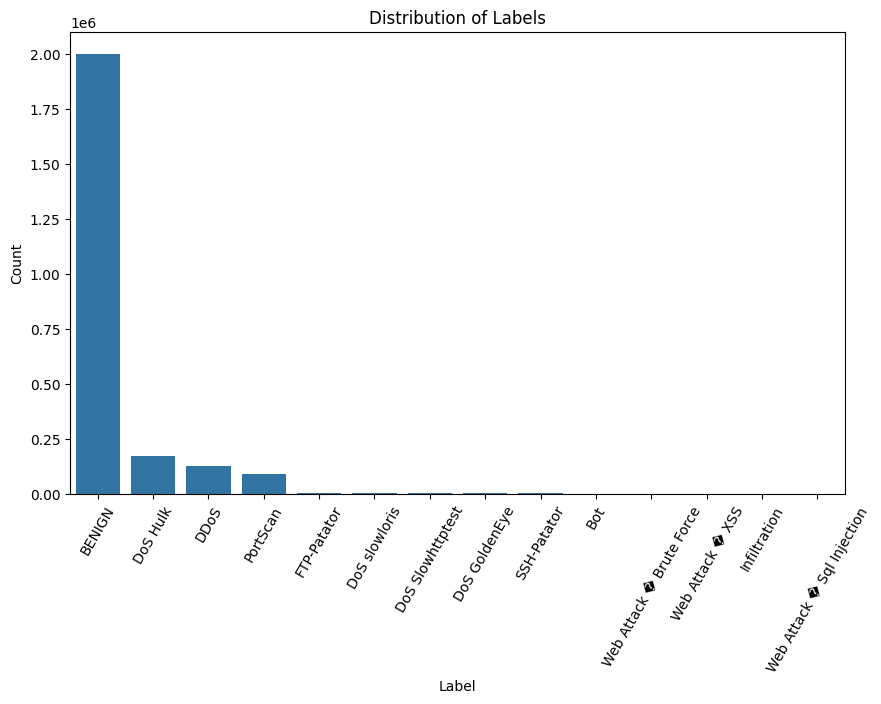

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

prediction_counts= df[' Label'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=prediction_counts.index, y=prediction_counts.values)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()

In [15]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index([' Label'], dtype='object')


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2421064 entries, 0 to 2715025
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int32  
 1    Flow Duration                int32  
 2    Total Fwd Packets            int32  
 3    Total Backward Packets       int32  
 4   Total Length of Fwd Packets   int32  
 5    Total Length of Bwd Packets  int32  
 6    Fwd Packet Length Max        int32  
 7    Fwd Packet Length Min        int32  
 8    Fwd Packet Length Mean       float32
 9    Fwd Packet Length Std        float32
 10  Bwd Packet Length Max         int32  
 11   Bwd Packet Length Min        int32  
 12   Bwd Packet Length Mean       float32
 13   Bwd Packet Length Std        float32
 14  Flow Bytes/s                  float32
 15   Flow Packets/s               float32
 16   Flow IAT Mean                float32
 17   Flow IAT Std                 float32
 18   Flow IAT Max              

In [17]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix =df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
              colname = corr_matrix.columns[i]
              col_corr.add(colname)
    return col_corr

corr_features = correlation(df, 0.85)
corr_features

{' Active Min',
 ' Average Packet Size',
 ' Avg Bwd Segment Size',
 ' Avg Fwd Segment Size',
 ' Bwd IAT Mean',
 ' Bwd IAT Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' CWE Flag Count',
 ' ECE Flag Count',
 ' Flow IAT Max',
 ' Fwd Header Length.1',
 ' Fwd IAT Max',
 ' Fwd IAT Mean',
 ' Fwd IAT Min',
 ' Fwd IAT Std',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 ' Idle Max',
 ' Idle Min',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' SYN Flag Count',
 ' Subflow Bwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Fwd Bytes',
 ' Total Backward Packets',
 ' Total Length of Bwd Packets',
 ' act_data_pkt_fwd',
 ' min_seg_size_forward',
 'Fwd IAT Total',
 'Fwd Packets/s',
 'Idle Mean',
 'Subflow Fwd Packets'}

In [18]:
df.drop(corr_features,axis=1,inplace=True)

In [19]:
X= df.drop([' Label'],axis=1)
y = df[' Label']

In [20]:
unique_labels = y.unique()
print(unique_labels)

[ 0  2  9  1  8 11 13 12  7 10  6  5  4  3]


In [21]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, shuffle=True)

In [23]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       'Total Length of Fwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Min', 'Bwd IAT Total',
       ' Bwd IAT Std', ' Bwd IAT Max', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', ' Bwd Packets/s', ' Min Packet Length',
       'FIN Flag Count', ' RST Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' Down/Up Ratio',
       'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate',
       ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward', 'Active Mean',
       ' Active Std', ' Active Max', ' Idle Std', ' Label'],
      dtype='object')

###Model

In [24]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=10)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [25]:
y_pred = model.predict(X_test)

In [26]:
# Calculate training and testing accuracy
training_accuracy = accuracy_score(y_train, model.predict(X_train))
testing_accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Training accuracy:", training_accuracy)
print("Testing accuracy:", testing_accuracy)


Training accuracy: 0.9969916799643131
Testing accuracy: 0.9969414286687883


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    400294
           1       0.89      0.70      0.79       384
           2       1.00      1.00      1.00     25545
           3       0.99      0.90      0.95       846
           4       1.00      0.99      0.99     34635
           5       0.93      0.98      0.96      1020
           6       0.97      0.97      0.97      1066
           7       1.00      1.00      1.00      1183
           8       0.00      0.00      0.00         9
           9       0.99      1.00      0.99     18137
          10       1.00      0.93      0.96       653
          11       0.50      0.73      0.59       308
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00       129

    accuracy                           1.00    484213
   macro avg       0.73      0.73      0.73    484213
weighted avg       1.00      1.00      1.00    484213



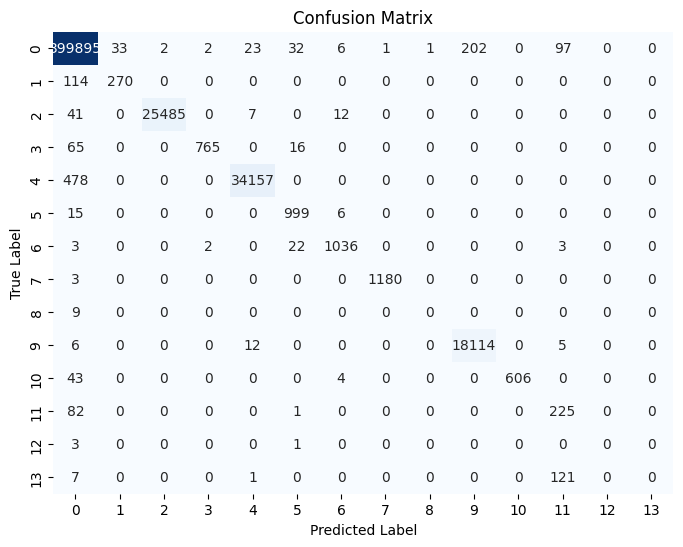

In [27]:
# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [28]:
le.inverse_transform(y_pred)
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred)))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    400294
                       Bot       0.89      0.70      0.79       384
                      DDoS       1.00      1.00      1.00     25545
             DoS GoldenEye       0.99      0.90      0.95       846
                  DoS Hulk       1.00      0.99      0.99     34635
          DoS Slowhttptest       0.93      0.98      0.96      1020
             DoS slowloris       0.97      0.97      0.97      1066
               FTP-Patator       1.00      1.00      1.00      1183
              Infiltration       0.00      0.00      0.00         9
                  PortScan       0.99      1.00      0.99     18137
               SSH-Patator       1.00      0.93      0.96       653
  Web Attack � Brute Force       0.50      0.73      0.59       308
Web Attack � Sql Injection       0.00      0.00      0.00         4
          Web Attack � XSS       0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# Specify the directory path where you want to save the model
model_dir = '/content/drive/My Drive/MyModels/'
model_path = model_dir + 'decision_tree_model.joblib'

# Save the model
joblib.dump(model, model_path)

print(f"Model saved to {model_path}")


Model saved to /content/drive/My Drive/MyModels/decision_tree_model.joblib
